# Model validation: A bibliometric analysis of the literature

## Sibel Eker
### June 2018


This notebook presents a bibliometric and text-mining analysis conducted on model validation. The analysis is presented in

Eker, S., Rovenskaya, E., Langan, S., Obersteiner, M. (under review) **Model validation: A bibliometric analysis of the literature**.



- Title, abstract and keywords include "model validation" OR "model validity" OR "model evaluation"  OR  "model assessment"  OR  "model testing"


- Published in English, from 1980 to present


- Limited to the fields Environmental Science; Computer Science; Agricultural and Biological Sciences; Mathematics; Energy; Social Sciences; Economics, Econometrics and Finance; Decision Sciences; Multidisciplinary


- Returned 10739 documents




## Data preparation - Parsing the text file

In [12]:
directory = 'H:/MyDocuments/IIASA-validation/Text_data/April2018/'
files = ['17-18.xlsx',
         '16.xlsx',
         '14-15.xlsx',
         '12-13.xlsx',
         '10-11.xlsx',
         '06-09.xlsx',
         '00-05.xlsx',
         '80-99.xlsx']

add_files = ['Barlas.xlsx',
         'Oreskes.xlsx',
         'Jakeman.xlsx']


import pandas as pd
dfs = []
for file in files:
    dfs.append(pd.read_excel(directory+file, index_col='Authors'))

df = pd.concat(dfs)
print(df.shape)

df.drop_duplicates(subset='Title', inplace=True)
df.shape


(10739, 10)


(10688, 10)

In [13]:
#ADDITIONAL FILES WITH THE WELL-KNOWN PUBLICATIONS
for file in add_files:
    dfs.append(pd.read_excel(directory+file, index_col='Authors'))

df = pd.concat(dfs)
print(df.shape)

df.drop_duplicates(subset='Title', inplace=True)
df.shape


(10756, 10)


(10699, 10)

In [11]:
df[df.index.str.contains('Oreskes')]

,Title,Year,Source title,Cited by,DOI,Link,Abstract,Index Keywords,References,EID
Authors,,,,,,,,,,
"Oreskes N., Shrader-Frechette K., Belitz K.","Verification, validation, and confirmation of ...",1994,Science,1699.0,10.1126/science.263.5147.641,https://www.scopus.com/inward/record.uri?eid=2...,Verification and validation of numerical model...,Computer simulation; Geochemistry; Mathematica...,NaN,2-s2.0-0028763687
Oreskes N.,Evaluation (not validation) of quantitative mo...,1998,Environmental Health Perspectives,112.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,The present regulatory climate has led to incr...,lead; conference paper; environmental exposure...,NaN,2-s2.0-0032457980
"Brysse K., Oreskes N., O'Reilly J., Oppenheimer M.",Climate change prediction: Erring on the side ...,2013,Global Environmental Change,94.0,10.1016/j.gloenvcha.2012.10.008,https://www.scopus.com/inward/record.uri?eid=2...,"Over the past two decades, skeptics of the rea...",anthropogenic effect; atmospheric gas; climate...,"Allan, R.P., Soden, B.J., Atmospheric warming ...",2-s2.0-84872602543


After cleaning the duplicates, there are 10699 documents left (including the well-known publications. Without them, 10688 documents)! Let me remove the ones that has no abstract!

In [14]:
df = df.dropna(axis=0, subset=['Abstract'])
df.shape

(10699, 10)

In [11]:
journal_list = list(df['Source title'])

In [7]:
#NUMBER OF ARTICLES OVER TIME
import numpy as np
years  = np.arange(1980, 2018)
y = {}
for year in years:
    y[year] = len(df[df['Year'] == year])
df_years = pd.DataFrame.from_dict(y, orient='index')
df_years.head()




,0
1980,10
1981,21
1982,21
1983,21
1984,26


In [8]:
df_years['year'] = df_years.index
df_years.columns = ['Number of validation publications', 'year']
df_years.head()

,Number of validation publications,year
1980,10,1980
1981,21,1981
1982,21,1982
1983,21,1983
1984,26,1984


In [9]:
df_dummy = pd.read_excel(directory+'Total_overtime.xlsx')
for index, row in df_dummy.iterrows():
    df_years.loc[row['year'], 'total'] = row['total']
df_years['total'].head()

1980    3457.0
1981    3928.0
1982    4840.0
1983    5510.0
1984    6022.0
Name: total, dtype: float64

In [10]:
df_years['Percentage of validation publications in total modeling pub.'] = 100*df_years['Number of validation publications']/df_years['total']

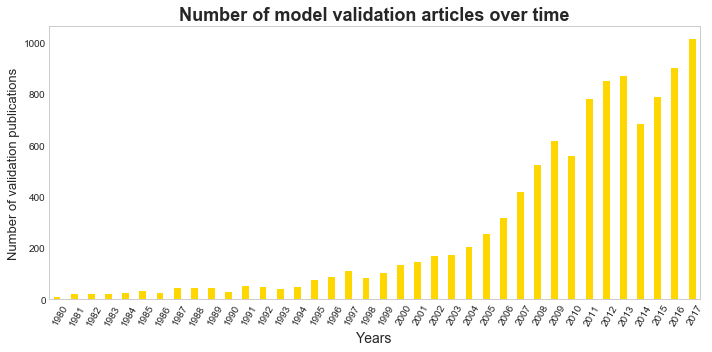

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(10, 5))
#ax2 = ax.twinx()


ax.set_ylabel('Number of validation publications', fontsize=13)
#ax2.set_ylabel('Percentage of validation publications', fontsize=13)

df_years['Number of validation publications'].plot(kind='bar', color='gold', ax=ax, width=0.4, position=1)
#df_years['Percentage of validation publications in total modeling pub.'].plot(kind='bar', color='darkgrey', ax=ax2, width=0.4, position=0)

ax.set_xlabel('Years', fontsize=14)
ax.set_title("Number of model validation articles over time", fontsize=18, fontweight='bold')
#lbls = list(years[:-1]) + ['2017*']
lbls = list(years)
ax.set_xticklabels(lbls, fontsize=10, rotation=60)
ax.grid(False)
#ax2.grid(False)
#ax.legend(loc=0, scatterpoints = 1, fontsize=14, bbox_to_anchor=(0.425, .9), borderaxespad=0.)
#ax2.legend(loc=0, scatterpoints = 1, fontsize=14, bbox_to_anchor=(0.684, .85), borderaxespad=0.)
plt.tight_layout()
plt.savefig(directory+'OverTime_v2.png', dpi=600, )
plt.show()

## Remove the stopwords from the abstracts

In [8]:
stopwords =[]
with open(directory+'stopwords.txt', 'r') as f:      
    for line in f:
        word=line.rstrip()
        stopwords.append(word)
f.close()

#print(stopwords)

## Clean the abstracts and count the words

In [9]:
import collections as c
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer() 

# create a dictionary to save your work
counter_dict = {}
all_words = c.Counter()

# Get the article id
for index, row in df.iterrows():
    
    # Initialize your counts and lists
    # This is reset with every article
    content = c.Counter()
    stopwordcount = 0

    abstract = row['Abstract']

    # Remove most punctuation
    #depunct = re.sub('[;,\.]@','',abstract) 
    depunct = "".join(c for c in abstract if c not in [':', ',', ';', '.', '-', '@', '(', ')']) 
    # Remove upper case
    low = depunct.lower()
    # make a list of words
    words = low.split(" ")
    for word in words:
        if word in stopwords:
            # if its a stopword count it 
            stopwordcount+=1
        else:
            # if its a content word, stem it and count it
            stem = stemmer.stem(word)
            content[stem]+=1

    # add all the stopwords under a single count
    content['allstopwords']=stopwordcount

    # keep track of the total list of words
    all_words+=content

    # make a dictionary of counters, one for each abstract

    counter_dict[index]=content

    # start again on the next article

In [10]:
#most common words in the collection of all these abstracts
print(all_words.most_common(20))

[('allstopwords', 973600), ('data', 11675), ('predict', 8914), ('simul', 8395), ('result', 7631), ('system', 6502), ('develop', 6126), ('evalu', 6053), ('test', 5551), ('perform', 5510), ('model', 5422), ('water', 5412), ('method', 5398), ('measur', 5269), ('estim', 5268), ('soil', 5204), ('base', 4829), ('paramet', 4577), ('process', 4437), ('assess', 3690)]


Exclude 'model', because it is the defualt keyword. If I look at  the rest, "data and predict" come next, implying the traditional observation-based validation, and prediction purposes. interesting that "water and soil" have also emerged.



In [11]:
del_words = ['allstopwords', 'model', 'result', 'show', 'present', 'gener', 'approach', 'elsevi', 'ltd', 'includ', 'perform']
for key in del_words:
    if key in all_words:
        del all_words[key]
    if key in counter_dict:
        del counter_dict[key]

In [16]:
print(all_words.most_common(20))

[('data', 12071), ('predict', 9182), ('simul', 8597), ('system', 6625), ('develop', 6301), ('evalu', 6268), ('test', 5664), ('method', 5590), ('water', 5562), ('estim', 5431), ('measur', 5376), ('soil', 5335), ('base', 4976), ('paramet', 4691), ('process', 4545), ('assess', 3821), ('valid', 3735), ('compar', 3676), ('observ', 3657), ('time', 3557)]


In [20]:
df_wordcount = pd.DataFrame(all_words.most_common(20))
#df_wordcount['words'] = df_wordcount.index.values
#df_wordcount['wordcount'] = df_wordcount[0]
df_wordcount.columns = ['words', 'wordcount']
df_wordcount.head()

,words,wordcount
0,data,12071
1,predict,9182
2,simul,8597
3,system,6625
4,develop,6301


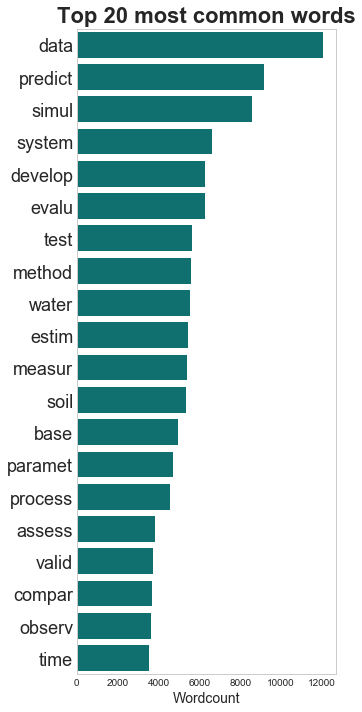

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5, 10))


ax = sns.barplot(x='wordcount', y='words', data=df_wordcount, color="TEAL")
ax.set_ylabel('')
ax.set_xlabel('Wordcount', fontsize=14)
ax.set_title("Top 20 most common words", fontsize=22, fontweight='bold')
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
ax.set_yticklabels(list(df_wordcount['words']), fontsize=18)
ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'top_words_Authors.png', dpi=300, )
plt.show()

In [17]:
import json
with open(directory+'counter_dict_JSON.txt', 'w') as fp:
    json.dump(counter_dict, fp)
fp.close()

with open(directory+'all_words_JSON.txt', 'w') as fp:
    json.dump(all_words, fp)
fp.close()

## Top journals

In [18]:
journal_counter = c.Counter()
for index, row in df.iterrows():
    journal = row['Source title']
    journal_counter[journal]+=1

new_list=journal_counter.most_common(20)      
df_journal = pd.DataFrame(new_list)
df_journal.columns = ['journal', 'count']


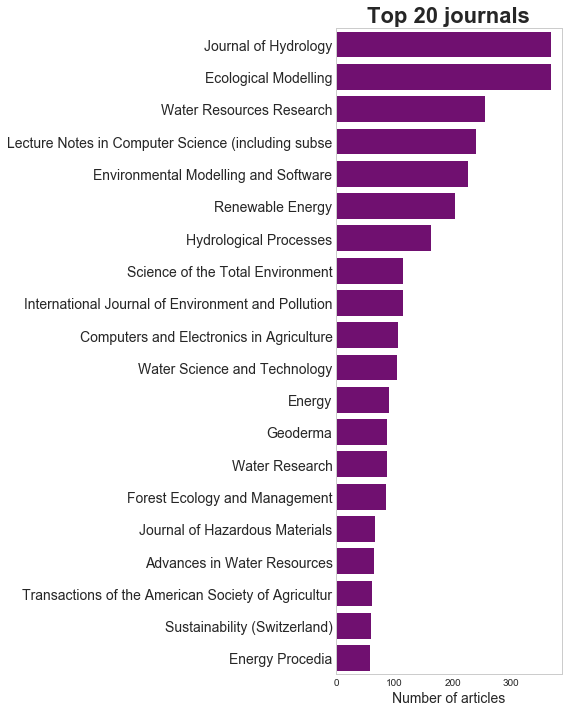

In [23]:
f, ax = plt.subplots(figsize=(8, 10))

sns.set_style("whitegrid")
ax = sns.barplot(x="count", y="journal", data=df_journal, color="PURPLE")
ax.set_ylabel('')
ax.set_xlabel("Number of articles", fontsize=14)
ax.set_title("Top 20 journals", fontsize=22, fontweight="bold")

ylabels = ax.get_yticklabels()
ylabels = [item.get_text()[:50] for item in ylabels]

ax.set_yticklabels(ylabels, fontsize=14)

ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'top_journals_Authors.png', dpi=300, )
plt.show()

In [31]:
del df_journal
del df_wordcount

In [24]:
water = {}
energy = {}
method = {}
eco_env_geo = {}
others = {}

for journal in list(journal_counter):
    lower = str(journal).lower()
    if any(x in lower for x in ['water', 'hydr']): 
        water[journal] = journal_counter[journal]
    elif 'energy' in lower:
        energy[journal] = journal_counter[journal]
    elif any(x in lower for x in['simul', 'decision', 'operation', 'system dynamics']):
        method[journal] = journal_counter[journal]
    elif any(x in lower for x in ['eco', 'env', 'geo', 'agricultur']):
        eco_env_geo[journal] = journal_counter[journal]
    else:
        others[journal] = journal_counter[journal]

c_water = c.Counter(water)
c_energy = c.Counter(energy)
c_method = c.Counter(method)
c_env = c.Counter(eco_env_geo)
c_others = c.Counter(others)

print("WATER")
print(c_water.most_common(5))
df_water = pd.DataFrame(list(c_water.most_common(5)))
df_water.columns = ['journal', 'count']
df_water['category'] = 'water'
print()
print("ENERGY")
print(c_energy.most_common(5))
df_energy = pd.DataFrame(list(c_energy.most_common(5)))
df_energy.columns = ['journal', 'count']
df_energy['category'] = 'energy'
print()
print("METHOD")
print(c_method.most_common(10))
df_method = pd.DataFrame(list(c_method.most_common(9)))
df_method.columns = ['journal', 'count']
df_method['category'] = 'method'
print()
print("ENV, ECO, GEO")
print(c_env.most_common(10))
df_env = pd.DataFrame(list(c_env.most_common(10)))
df_env.columns = ['journal', 'count']
df_env['category'] = 'env_eco'

print()
print("OTHERS")
print(c_others.most_common(5))
df_others = pd.DataFrame(list(c_others.most_common(5)))
df_others.columns = ['journal', 'count']
df_others['category'] = 'others'

WATER
[('Journal of Hydrology', 368), ('Water Resources Research', 255), ('Hydrological Processes', 163), ('Water Science and Technology', 105), ('Water Research', 87)]

ENERGY
[('Renewable Energy', 204), ('Energy', 90), ('Energy Procedia', 59), ('Wind Energy', 44), ('Energy Conversion and Management', 42)]

METHOD
[('Proceedings - Winter Simulation Conference', 33), ('European Journal of Operational Research', 25), ('Simulation Modelling Practice and Theory', 21), ('Simulation Series', 18), ('Simulation', 17), ('Journal of Statistical Computation and Simulation', 14), ('18th World IMACS Congress and MODSIM09 International Congress on Modelling and Simulation: Interfacing Modelling and Simulation with Mathematical and Computational Sciences, Proceedings', 12), ('SPE Production and Operations', 11), ('Mathematics and Computers in Simulation', 9), ('MODSIM 2011 - 19th International Congress on Modelling and Simulation - Sustaining Our Future: Understanding and Living with Uncertainty', 9

In [25]:
import matplotlib.gridspec as gridspec
def make_grid():
    grid = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 2, 2]) 
    grid.update(wspace = 0.2,
                hspace = .7)
    
    figure = plt.figure()
    figure.set_figwidth(10)
    figure.set_figheight(13)
    return figure, grid

def make_axis(figure, grid):
    ax_water = plt.subplot(grid[0,0])
    ax_energy = plt.subplot(grid[1,0])
    ax_method = plt.subplot(grid[2,0])
    ax_env = plt.subplot(grid[3,0])
    
    ax_water.set_title("Top journals in the water domain", size=18)
    ax_energy.set_title("Top journals in the energy domain", size=18)
    ax_method.set_title("Top journals in the method domain", size=18)
    ax_env.set_title("Top journals in the environment, ecosystems and geosciences domain", size=18)
    
    return ax_water, ax_energy, ax_method, ax_env

In [26]:
for index, row in df_method.iterrows():
    if len(row['journal']) > 50:
        df_method.loc[index, 'journal'] = row['journal'][:50]

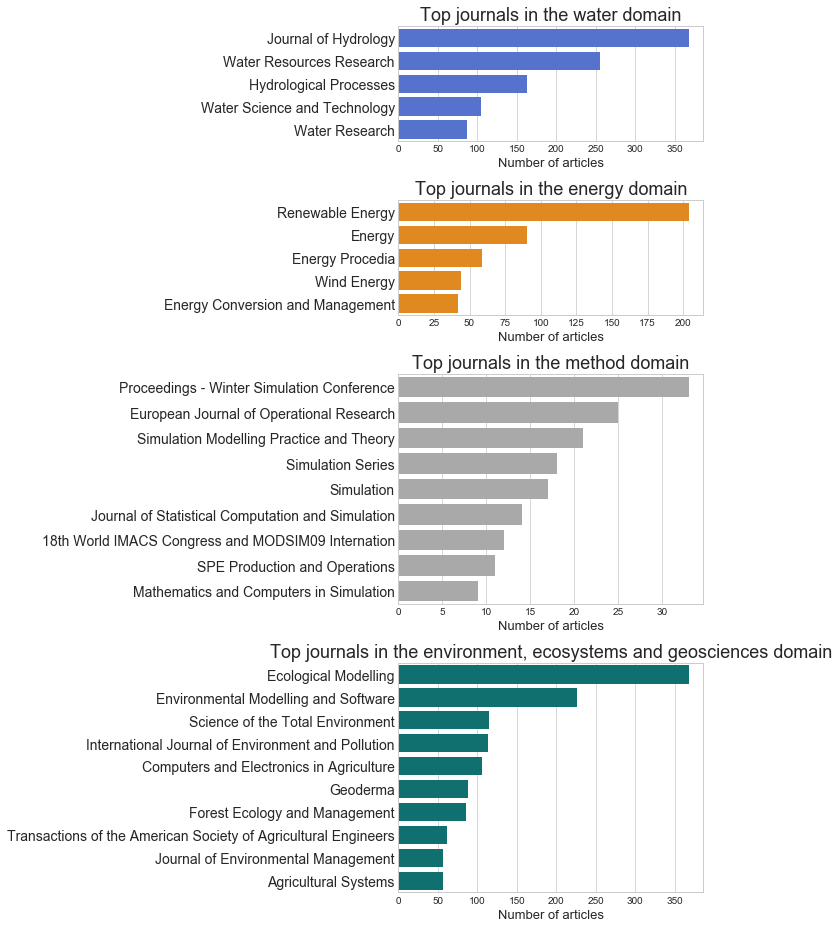

In [27]:

fig, g = make_grid()
axes = list(make_axis(fig, g))


        
        
sns.set_style("whitegrid")
sns.barplot(ax=axes[0], x="count", y="journal", data=df_water, color="royalblue")
sns.barplot(ax=axes[1], x="count", y="journal", data=df_energy, color="darkorange")
sns.barplot(ax=axes[2], x="count", y="journal", data=df_method, color="darkgrey")
sns.barplot(ax=axes[3], x="count", y="journal", data=df_env, color="teal")

for ax in axes:
    ax.set_ylabel('')
    ax.set_xlabel("Number of articles", fontsize=13)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 

g.tight_layout(fig)
plt.savefig(directory+'top_journals_domains_Authors.png', dpi=600)
plt.show()


In [32]:
del df_env
del df_method
del df_energy
del df_water

## Top authors

In [28]:
author_counter = c.Counter()

for index, row in df.iterrows():
    #authors = row['Authors']
    authors = index.split('., ')
    for author in authors:
        author_counter[author]+=1

new_list=author_counter.most_common(40)      
print("The top ten authors in this set are:")
for pair in new_list:
    print(pair[0],pair[1])

The top ten authors in this set are:
[No author name available] 96
Wang Y 38
Liu Y 37
Zhang X 32
Wang H 32
Li Y 31
Zhang J 30
Wang J 30
Wang X 29
Li J 29
Zhang Y 29
Li X 27
Zhang C 22
Chen Y 20
Liu J 20
Li C 20
Wang L 19
Chen J 19
Chen H 19
Yang Y 19
Chen X 18
Zhang L 18
Li Z 18
Wang C 17
Liu X 17
Li H 17
Wang S 16
Wang Q 16
Yang J 16
Liu S 16
Li B 16
Zhang Y. 15
Wang Y. 15
Lee S 15
Li W 14
Zhang B 14
Chen L 14
Peng C 14
Jr 13
Zhao Y 13


## Mapping articles with a nonlinear technique -tSNE

Note that this looks atthe resemblance of abstracts. It does not include keywords!

In [12]:
# prepare the data
import pandas as pd
#from memory_profiler import profile

df_counter = pd.DataFrame.from_dict(counter_dict, orient='index')
for word in del_words:
    if word in list(df_counter.columns):
        del df_counter[word]

In [13]:
# fill in the missing values with zeros
df_counter.fillna(0, inplace=True)
# convert the data to integers
df_counter = df_counter.astype(int)
# find and eliminate any records which have no data
doc_count=df_counter.sum(axis='columns')
print(len(df_counter[doc_count!=0]))
df_counter = df_counter[doc_count != 0]

10045


In [14]:
# df_counter is a dataframe of the documents in the rows, and all the words in the columns
df_counter.shape

(10045, 53484)

In [15]:
no_words = df_counter.sum(axis='index')
# no_words is a dataframe with all the words in the rows, and how many times they occur in the column
no_words.shape

(53484,)

In [17]:
no_words = no_words[no_words>=5]
no_words.shape

(11267,)

In [56]:
no_words.index

Index(['project', 'coastal', 'wetland', 'distribut', 'futur', 'sealevel',
       'rise', 'scenario', 'assist', 'decisionmak',
       ...
       'zwischen', 'arten', 'wurden', 'chrysophyt', 'album', 'mirex', 'baler',
       'endothal', 'exam', 'slsa'],
      dtype='object', length=11994)

In [19]:
df_counter_reduced = df_counter[list(no_words.index)]

In [20]:
df_counter_reduced.shape

(10045, 11267)

OK, I have around 10000 documents. I also drop the words that occured less than 5 times in the whole dataset. Otherwise, the input data is huge and I receive memory errors when I run tSNE. These words that are used so few times in the whole dataset are not important to signify the similarity between the documents. Therefore, they can safely be  removed. Eventually, I'm working with a dataset of 10045 documents and 11267 words (instead of 53484 words).

In [21]:
df_counter_reduced.to_csv(directory+'df_counter_dataset1.csv')

In [22]:
del df_counter

In [23]:
#NORMALIZE THE COUNTER DICTIONARY

doc_count = df_counter_reduced.sum(axis='columns')

df_count_n = df_counter_reduced.div(doc_count,axis='rows')
df_count_n.head()

,observ,cut,accur,plough,content,achiev,speed,obtain,weight,loam,...,hfo,shelfoo,habitatselect,hwt,atofm,endothal,gbt,tcmcb,pma,cotton2k
"(Sean) Qian Z., Li J., Li X., Zhang M., Wang H.",0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AL-Hamad K.Kh., Nassehi V., Khan A.R.",0.015873,0.0,0.0,0.0,0.0,0.000000,0.0,0.007937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Ababou R., Sagar B., Wittmeyer G.",0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Abaci O., Papanicolaou A.N.T.",0.003802,0.0,0.0,0.0,0.0,0.003802,0.0,0.003802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Abadie L.M., Galarraga I., Rübbelke D.",0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
del df_counter_reduced

In [25]:
df_count_n.shape

(10045, 11267)

In [26]:
import sklearn.manifold as map
import time

start = time.time()
model_map=map.TSNE(n_components=2)
X2=model_map.fit_transform(df_count_n)
x4,y4 = X2[:,0],X2[:,1]
end = time.time()
print("mapping took {} seconds.".format(end-start))

mapping took 3006.2094299793243 seconds.


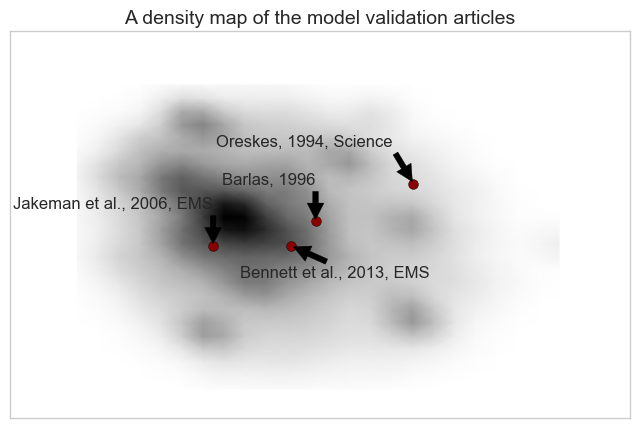

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kde
sns.set_style("whitegrid")
np.random.seed(1077)
fig, ax = plt.subplots(figsize=(8,5))
nbins=24
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(X2.T,bw_method='silverman')
xi, yi = np.mgrid[x4.min():x4.max():nbins*1j, y4.min():y4.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
ax.set_title('A density map of the model validation articles', fontsize=14)
ax.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap='Greys', shading='gouraud')

ax.scatter(x_scatter, y_scatter, s=50, c='darkred')
ax.annotate('Oreskes, 1994, Science',
            xy=(x_scatter[0], y_scatter[0]), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Bennett et al., 2013, EMS',
            xy=(x_scatter[1], y_scatter[1]), xycoords='data',
            xytext=(100, -25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Jakeman et al., 2006, EMS',
            xy=(x_scatter[2], y_scatter[2]), xycoords='data',
            xytext=(0, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Barlas, 1996',
            xy=(x_scatter[3], y_scatter[3]), xycoords='data',
            xytext=(0, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.set_xticks([])
ax.set_yticks([])
plt.savefig(directory+'map_colormesh_v2_annot_barla.png', dpi=300)
plt.show()

In [27]:
#save the mapping results

df_mapping = pd.DataFrame(x4, y4)
df_mapping.columns = ['y']
df_mapping.to_csv(directory+'tsne_results_xy.csv')



In [17]:
df_mapping = pd.DataFrame.from_csv(directory+'tsne_results_xy.csv')
x4 = list(df_mapping.index)
y4 = list(df_mapping['y'])

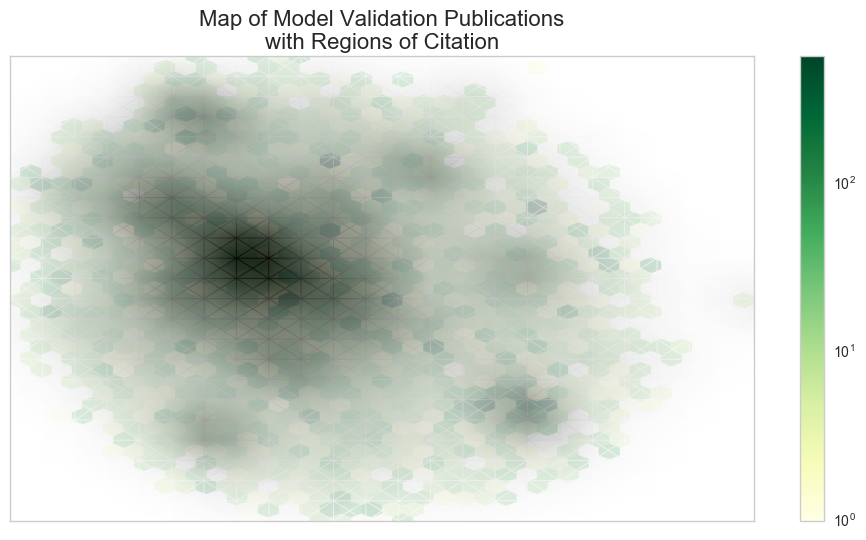

In [83]:
from scipy.misc import imread
import matplotlib.cbook as cbook
import matplotlib.colors as colors


#datafile = cbook.get_sample_data('C:/Users/Sibel/Documents/Notebooks/TxtData/'+'map_colormesh - Copy.png')
#img = imread(datafile)

fig, ax = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

#x4,y4 = X2[:,0],X2[:,1]


#cite_list = list(df['Cited by'])
ax.set_title('Map of Model Validation Publications\nwith Regions of Citation', fontsize=16)

plt.hexbin(x4,y4,cite_list,gridsize=36,cmap='YlGn',norm=colors.LogNorm())
#plt.scatter(x4, y4, c=year_list,cmap='YlGn')#,norm=colors.LogNorm())



ax.set_xticks([])
ax.set_yticks([])

plt.colorbar()
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap='Greys', shading='gouraud', alpha=0.8)
#extent = ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]
#plt.imshow(img, extent=extent)
plt.savefig(directory+'map_citation_v3.png', dpi=300)
plt.show()




plt.show()

In [38]:
# indices of three examplary publications

n_oreskes = df_count_n.index.get_loc('Oreskes N., Shrader-Frechette K., Belitz K.')
ky_n_jakman_ems = 'Bennett N.D., Croke B.F.W., Guariso G., Guillaume J.H.A., Hamilton S.H., Jakeman A.J., Marsili-Libelli S., Newham L.T.H., Norton J.P., Perrin C., Pierce S.A., Robson B., Seppelt R., Voinov A.A., Fath B.D., Andreassian V.'
ky_10_steps = 'Jakeman A.J., Letcher R.A., Norton J.P.'
n_bnt = df_count_n.index.get_loc(ky_n_jakman_ems)
n_jkman = df_count_n.index.get_loc(ky_10_steps)
print(n_oreskes, n_bnt,n_jkman)
#print("oreskes : ", x4[n_oreskes], y4[n_oreskes])

6446 795 3985


In [51]:
print(df_count_n.shape)
print(len(df_count_n.index))
df_mapped = df.loc[df_count_n.index]

df_mapped = df_mapped[~df_mapped.index.duplicated(keep='first')]
df_mapped.shape

(10045, 11267)
10045


(10045, 10)

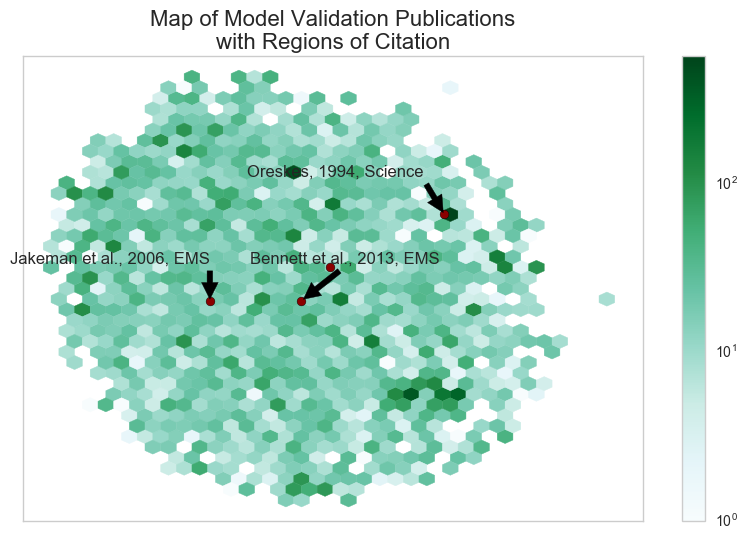

In [97]:
#citations

import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pylab as pyl
fig, ax = plt.subplots()

pyl.rcParams['figure.figsize'] = (10, 6)

#x4,y4 = X2[:,0],X2[:,1]

cite_list = list(df_mapped['Cited by'])
ax.set_title('Map of Model Validation Publications\nwith Regions of Citation', fontsize=16)
x_scatter = [x4[n_oreskes], x4[n_bnt], x4[n_jkman], x4[n_barlas]]
y_scatter = [y4[n_oreskes], y4[n_bnt], y4[n_jkman], y4[n_barlas]]

plt.hexbin(x4,y4,cite_list,gridsize=36,cmap='BuGn',norm=colors.LogNorm())
plt.colorbar()
#plt.scatter(x4, y4, c=year_list,cmap='YlGn')#,norm=colors.LogNorm())
ax.scatter(x_scatter, y_scatter, s=40, c='darkred')
ax.annotate('Oreskes, 1994, Science',
            xy=(x_scatter[0], y_scatter[0]), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Bennett et al., 2013, EMS',
            xy=(x_scatter[1], y_scatter[1]), xycoords='data',
            xytext=(100, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Jakeman et al., 2006, EMS',
            xy=(x_scatter[2], y_scatter[2]), xycoords='data',
            xytext=(0, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')



ax.set_xticks([])
ax.set_yticks([])


plt.savefig(directory+'map_citation_v2_barla.png', dpi=300)
plt.show()

# Topic modelling


In [82]:
# drop the "allstopwords" and "model" from the data frame.
print(df_counter_reduced.columns)
print(len(df_counter_reduced.columns))

del df_counter_reduced['paper']
del df_counter_reduced['articl']
del df_counter_reduced['=']
del df_counter_reduced['research']
print(len(df_counter_reduced.columns))

Index(['project', 'coastal', 'wetland', 'distribut', 'futur', 'sealevel',
       'rise', 'scenario', 'assist', 'decisionmak',
       ...
       'zwischen', 'arten', 'wurden', 'chrysophyt', 'album', 'mirex', 'baler',
       'endothal', 'exam', 'slsa'],
      dtype='object', length=11994)
11994
11990


In [83]:
import lda
import time 

a = time.time()

model4 = lda.LDA(n_topics=4, n_iter=5000, random_state=1)
model4 = model4.fit(df_counter_reduced.values) 
b = time.time()
c = b-a
print("time taken is", c)

INFO:lda:n_documents: 10366
INFO:lda:vocab_size: 11990
INFO:lda:n_words: 1045911
INFO:lda:n_topics: 4
INFO:lda:n_iter: 5000
INFO:lda:<0> log likelihood: -9756223
INFO:lda:<10> log likelihood: -8791344
INFO:lda:<20> log likelihood: -8464088
INFO:lda:<30> log likelihood: -8373390
INFO:lda:<40> log likelihood: -8334196
INFO:lda:<50> log likelihood: -8310389
INFO:lda:<60> log likelihood: -8292940
INFO:lda:<70> log likelihood: -8285353
INFO:lda:<80> log likelihood: -8276239
INFO:lda:<90> log likelihood: -8270030
INFO:lda:<100> log likelihood: -8265674
INFO:lda:<110> log likelihood: -8262075
INFO:lda:<120> log likelihood: -8260262
INFO:lda:<130> log likelihood: -8256187
INFO:lda:<140> log likelihood: -8254818
INFO:lda:<150> log likelihood: -8252894
INFO:lda:<160> log likelihood: -8252562
INFO:lda:<170> log likelihood: -8249641
INFO:lda:<180> log likelihood: -8248821
INFO:lda:<190> log likelihood: -8246702
INFO:lda:<200> log likelihood: -8247281
INFO:lda:<210> log likelihood: -8244352
INFO:ld

time taken is 193.95986151695251


In [84]:
import numpy as np
#the number of documents in each group
column_sum = np.sum(model4.doc_topic_, axis=0)
column_sum

array([ 1811.59110855,  4157.84598962,  2221.69988545,  2174.86301639])

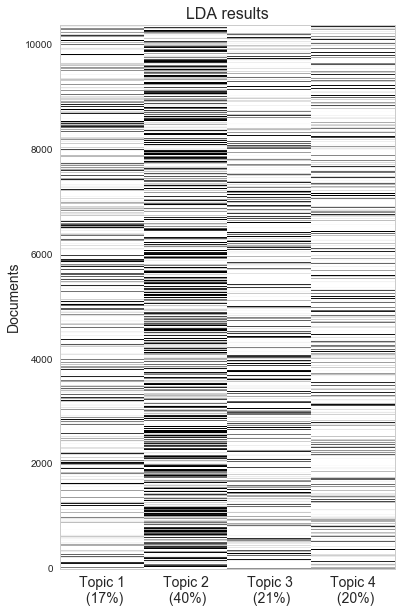

In [85]:
import matplotlib.pyplot as plt
doc_model=model4.doc_topic_

fig, ax = plt.subplots(figsize=(6,10))
heatmap = plt.pcolor(doc_model, cmap='Greys')
ax.set_title("LDA results", fontsize=16)
sm = np.sum(column_sum)
tick_labels = ['Topic {}\n ({}%)'.format(i+1, int(100*column_sum[i]/sm)) for i in range(4)]
ax.set_xticklabels(tick_labels, fontsize=14)
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_ylabel("Documents", fontsize=14)
plt.savefig(directory+'lda_results_4topics.png', dpi=300)
plt.show()

In [86]:
model4.doc_topic_

array([[  3.11871227e-02,   5.74446680e-01,   3.93360161e-01,
          1.00603622e-03],
       [  8.03858521e-04,   8.11897106e-02,   8.12700965e-01,
          1.05305466e-01],
       [  8.16993464e-04,   8.01470588e-01,   1.96895425e-01,
          8.16993464e-04],
       ..., 
       [  1.27551020e-03,   1.27551020e-03,   1.54336735e-01,
          8.43112245e-01],
       [  1.86832740e-02,   8.89679715e-04,   8.89679715e-04,
          9.79537367e-01],
       [  9.05797101e-04,   9.97282609e-01,   9.05797101e-04,
          9.05797101e-04]])

In [87]:
topic_word = model4.topic_word_  
n_top_words = 20
word_array = np.array(df_counter_reduced.columns)

for i, topic in enumerate(topic_word):
    topic_words = word_array[np.argsort(topic)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: predict speci data forest estim variabl tree sampl distribut area popul develop habitat method growth regress evalu spatial assess
Topic 2: data system evalu method test develop simul process propos base paramet applic estim assess inform network design set problem
Topic 3: simul concentr flow system measur data predict experiment wind condit develop air energi water valid test temperatur heat oper
Topic 4: soil water simul data predict calibr observ crop estim paramet climat measur hydrolog area yield field region spatial flow


In [132]:
topic_titles = ['Ecosystems', 'Methods', 'Emissions and Energy', 'Agriculture and Hydrology']

In [88]:
from wordcloud import WordCloud

In [94]:
topic_fraction = [column_sum[i]/sm for i in range(4)]
topic_order = np.argsort(topic_fraction)
print(topic_fraction, topic_order)

[0.17476279264387834, 0.40110418576263512, 0.21432566905723865, 0.20980735253624791] [0 3 2 1]


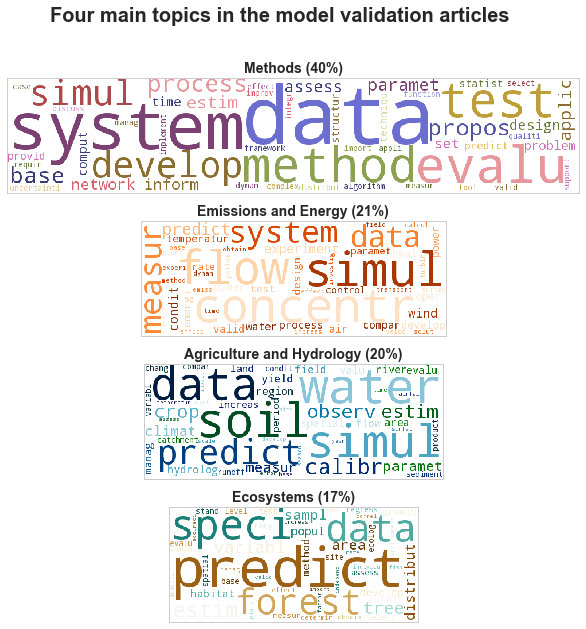

In [147]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



grid = gridspec.GridSpec(4, 1) 
grid.update(wspace = 0.1,
            hspace = .25)

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(10)
for i in range(4):
    axes[i] = plt.subplot(grid[i,0])
    axes[i].grid('off')
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])

n_top_words = 50
model_counts = np.array(model4.nzw_).T

cmaps = ['BrBG', 'tab20b', 'Oranges_r', 'ocean']

for i, topic in enumerate(topic_word):
    topic_words = word_array[np.argsort(topic)][:-n_top_words:-1]
    word_cloud_string =' '.join(topic_words)
    ax_i = 3 - topic_order[i]
    fr = topic_fraction[i]/max(topic_fraction)
    w = int(fr * 1000)
    wordcloudobj = WordCloud(height=200, width=w, background_color='white')
    wordcloud = wordcloudobj.generate(word_cloud_string)

    axes[ax_i].imshow(wordcloud.recolor(colormap=cmaps[i], random_state=1))
    axes[ax_i].set_title(topic_titles[i]+' ({}%)'.format(int(100*topic_fraction[i])), fontsize=14, fontweight='bold')


plt.suptitle("Four main topics in the model validation articles", fontsize=20, fontweight='bold')
plt.savefig(directory+'wordcloud_Dataset1_4topics.png', dpi=600)
plt.show()    

    

In [203]:
# CAN I NOW MATCH THE ARTICLE MAP WITH THESE TOPICS?
#doc_model is a 2d array 1961x4, means documents topics
# from doc_model, I'll take the maximum for each topic, then match it with the group.
categories = np.zeros(len(x4))
for i,doc in enumerate(doc_model):
    categories[i] = np.argmax(doc)+1
df_cat = pd.DataFrame({'x': x4, 'y': y4, 'topic':categories}, index=df_count_n.index)
df_cat.head()

,topic,x,y
"(Sean) Qian Z., Li J., Li X., Zhang M., Wang H.",2.0,3.298301,-1.768418
"AL-Hamad K.Kh., Nassehi V., Khan A.R.",3.0,3.378060,3.958365
"Ababou R., Sagar B., Wittmeyer G.",2.0,1.329908,0.558239
"Abaci O., Papanicolaou A.N.T.",4.0,-5.594486,4.362988
"Abadie L.M., Galarraga I., Rübbelke D.",2.0,0.711620,0.229777


In [186]:
doc_model

array([[  3.11871227e-02,   5.74446680e-01,   3.93360161e-01,
          1.00603622e-03],
       [  8.03858521e-04,   8.11897106e-02,   8.12700965e-01,
          1.05305466e-01],
       [  8.16993464e-04,   8.01470588e-01,   1.96895425e-01,
          8.16993464e-04],
       ..., 
       [  1.27551020e-03,   1.27551020e-03,   1.54336735e-01,
          8.43112245e-01],
       [  1.86832740e-02,   8.89679715e-04,   8.89679715e-04,
          9.79537367e-01],
       [  9.05797101e-04,   9.97282609e-01,   9.05797101e-04,
          9.05797101e-04]])

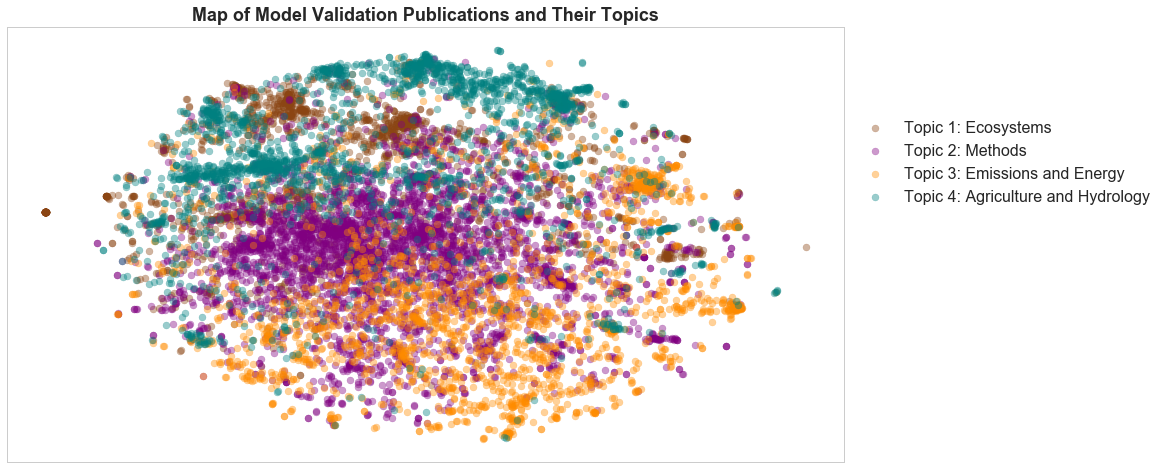

In [158]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))

ax.set_title('Map of Model Validation Publications and Their Topics', fontsize=18, fontweight='bold')
#plt.hexbin(x4,y4,cite_list,gridsize=36,cmap='YlGn',norm=colors.LogNorm())
colorlist = {1: 'saddlebrown',
             2: 'purple',
             3: 'darkorange',
             4: 'teal'}

ax.set_xticks([])
ax.set_yticks([])
for category in set(categories):
    df_slice = df_cat.loc[df_cat['topic'] == category]
    x = df_slice['x']
    y = df_slice['y']
    ax.scatter(x, y, s=50, c=colorlist[category], 
               label='Topic {}: {}'.format(int(category), topic_titles[int(category)-1]),
               alpha=.4)

lgd = ax.legend(loc=2, scatterpoints = 1, fontsize=16, bbox_to_anchor=(1.01, 0.8), borderaxespad=0.)

plt.savefig(directory+'topic_map_4topics.png', dpi=600,
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## CITATION ANALYSIS

I have ~10000 docs. I will make a matrix of 10000X10000, fill with 1-0. =1, if the title of document in the row is in the reference list of doc in the column. In that way, I actually don't even need to seperate the references. I should just remember to make everything lowercase.

Therefore, the column sum will give the total number of references in a document, the row sum is going to give how many times it's cited by the documents in my dataset.

In [84]:
for index, row in df_mapped.iterrows():
    df_mapped.loc[index, 'References'] = (re.sub('-','',str(row['References']))).lower()
    df_mapped.loc[index, 'Title'] = (re.sub('-','',str(row['Title']))).lower()

In [86]:
df_cite = pd.DataFrame(data=None, index=df_count_n.index, columns=df_count_n.index)
df_cite.shape

(10045, 10045)

In [87]:
df_references = df_mapped[~pd.isnull(df_mapped['References'])]
print(df_references.shape)

(10045, 10)


In [88]:

for index, row in df_mapped.iterrows():
    if not pd.isnull(row['Title']):
        try:
            title = str(row['Title']).lower()
            logic_index = df_references['References'].str.contains(title)
            sub_df = df_references[logic_index] #the articles that cite the index
            df_cite.loc[index, list(sub_df.index)] = 1
        except:
            print("didn't work")
    
df_cite.head()

C:\Users\Sibel\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


didn't work
didn't work
didn't work


,"(Sean) Qian Z., Li J., Li X., Zhang M., Wang H.","AL-Hamad K.Kh., Nassehi V., Khan A.R.","Ababou R., Sagar B., Wittmeyer G.","Abaci O., Papanicolaou A.N.T.","Abadie L.M., Galarraga I., Rübbelke D.","Abagnale C., Cardone M., Iodice P., Strano S., Terzo M., Vorraro G.","Aban I.B., Peña E.A.","Abbas F., Hammad H.M., Fahad S., Cerdà A., Rizwan M., Farhad W., Ehsan S., Bakhat H.F.","Abbas G., Wang L., Li W., Zhang M., Zheng P.","Abbas H., Fainekos G.",...,"Şengör S.S., Barua S., Gikas P., Ginn T.R., Peyton B., Sani R.K., Spycher N.F.","Šarkić A., Höffer R.","Ševčíková H., Simonson M., Jensen M.","Št'astná M., Oppeltová P., Dufková J.","Št'astná M., Trnka M., Křen J., Dubrovský M., Źalud Z.","Štula M., Stipaničev D., Maras J.","Štůsek J., Charvátová D., Charvát Z.","Šípek V., Tesar M.","Šťastná M., Dufková J.","Żytkow J.M., Fischer P.J."
"(Sean) Qian Z., Li J., Li X., Zhang M., Wang H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"AL-Hamad K.Kh., Nassehi V., Khan A.R.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ababou R., Sagar B., Wittmeyer G.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abaci O., Papanicolaou A.N.T.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abadie L.M., Galarraga I., Rübbelke D.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_cite.fillna(0, inplace=True)

In [193]:
df_mapped[df_cite.sum(axis='columns')>=1]

C:\Users\eker\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,Year,Source title,Cited by,DOI,Link,Abstract,Index Keywords,References,EID
Authors,,,,,,,,,,
"Petracca L.S., Frair J.L., Cohen J.B., Calderón A.P., Carazo-Salazar J., Castañeda F., Corrales-Gutiérrez D., Foster R.J., Harmsen B., Hernández-Potosme S., Herrera L., Olmos M., Pereira S., Robinson H.S., Robinson N., Salom-Pérez R., Urbina Y., Zeller K.A., Quigley H.",robust inference on largescale species habitat...,2018,Journal of Applied Ecology,NaN,10.1111/1365-2664.12972,https://www.scopus.com/inward/record.uri?eid=2...,Evaluating range-wide habitat use by a target ...,Panthera onca,"bailey, l.l., mackenzie, d.i., nichols, j.d., ...",2-s2.0-85029040832
Condamine F.L.,limited by the roof of the world: mountain rad...,2018,Biology Letters,NaN,10.1098/rsbl.2017.0622,https://www.scopus.com/inward/record.uri?eid=2...,Mountainous areas contain a substantial part o...,biodiversity; butterfly; carrying capacity; eq...,"moen, d., morlon, h., why does diversification...",2-s2.0-85044027018
"Knowles L.L., Massatti R.",distributional shifts – not geographic isolati...,2017,Ecography,2.0,10.1111/ecog.02893,https://www.scopus.com/inward/record.uri?eid=2...,"As biodiversity hotspots, montane regions have...",Bayesian analysis; biodiversity; divergence; g...,"alvaradoserrano, d.f., knowles, l.l., environm...",2-s2.0-85013059107
"Steger C., Butt B., Hooten M.B.",safari science: assessing the reliability of c...,2017,Journal of Applied Ecology,NaN,10.1111/1365-2664.12921,https://www.scopus.com/inward/record.uri?eid=2...,Protected areas are the cornerstone of global ...,assessment method; Bayesian analysis; biologic...,"anderson, t.m., hopcraft, j.g.c., eby, s., rit...",2-s2.0-85019594158
"Atkinson A.D., Hill R.R., Pignatiello, J.J., Jr., Vining G.G., White E.D., Chicken E.",wavelet anova approach to model validation,2017,Simulation Modelling Practice and Theory,1.0,10.1016/j.simpat.2017.08.004,https://www.scopus.com/inward/record.uri?eid=2...,Model validation is that critical component in...,Frequency domain analysis; Statistical tests; ...,"sargent, r.g., verification and validation of ...",2-s2.0-85027867602
"Falah F., Ghorbani Nejad S., Rahmati O., Daneshfar M., Zeinivand H.",applicability of generalized additive model in...,2017,Geocarto International,NaN,10.1080/10106049.2016.1188166,https://www.scopus.com/inward/record.uri?eid=2...,Groundwater is the most valuable natural resou...,NaN,"adiat, k.a.n., nawawi, m.n.m., abdullah, k., a...",2-s2.0-84976332670
"Black C.K., Masters M.D., LeBauer D.S., Anderson-Teixeira K.J., DeLucia E.H.",root volume distribution of maturing perennial...,2017,Plant and Soil,1.0,10.1007/s11104-017-3333-7,https://www.scopus.com/inward/record.uri?eid=2...,Aims: Root architecture drives plant ecology a...,Bayesian analysis; belowground biomass; biomas...,"agostini, f., gregory, a.s., richter, g.m., ca...",2-s2.0-85026906882
"Yakoub A., Lloveras J., Biau A., Lindquist J.L., Lizaso J.I.",testing and improving the maize models in dssa...,2017,Field Crops Research,2.0,10.1016/j.fcr.2017.07.002,https://www.scopus.com/inward/record.uri?eid=2...,The DSSAT (Decision Support System for Agrotec...,agricultural technology; biomass; crop yield; ...,"batchelor, w.d., basso, b., paz, j.o., example...",2-s2.0-85025122842
"Cheng K., Lu Z., Zhou Y., Shi Y., Wei Y.",global sensitivity analysis using support vect...,2017,Applied Mathematical Modelling,2.0,10.1016/j.apm.2017.05.026,https://www.scopus.com/inward/record.uri?eid=2...,Global sensitivity analysis (GSA) plays an imp...,Iterative methods; Orthogonal functions; Polyn...,"homma, t., saltelli, a., importance measure in...",2-s2.0-85020656244


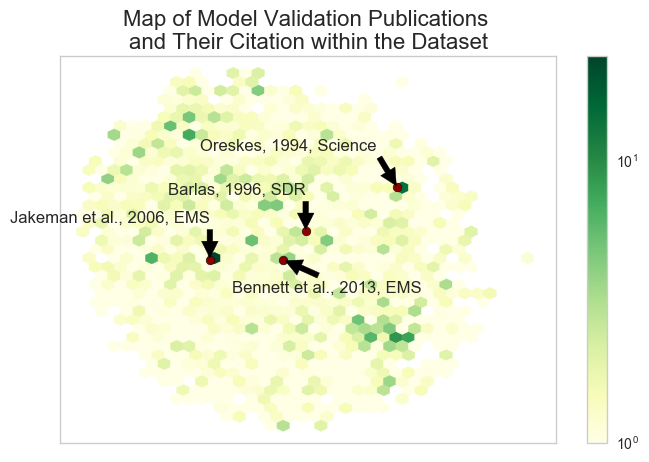

In [103]:
#make a colormap of the region, like the previous citation figure, but this time, according to how many times it's cited
#by the articles in this dataset
fig, ax = plt.subplots()

pyl.rcParams['figure.figsize'] = (8, 5)

x4,y4 = X2[:,0],X2[:,1]
cite_list = list(df_cite.sum(axis='columns'))
ax.set_title('Map of Model Validation Publications \nand Their Citation within the Dataset', fontsize=16)
plt.hexbin(x4,y4,cite_list,gridsize=36,cmap='YlGn',norm=colors.LogNorm())
#plt.scatter(x4, y4, c=year_list,cmap='YlGn')#,norm=colors.LogNorm())
ax.scatter(x_scatter, y_scatter, s=40, c='darkred')
ax.annotate('Oreskes, 1994, Science',
            xy=(x_scatter[0], y_scatter[0]), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Bennett et al., 2013, EMS',
            xy=(x_scatter[1], y_scatter[1]), xycoords='data',
            xytext=(100, -25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Jakeman et al., 2006, EMS',
            xy=(x_scatter[2], y_scatter[2]), xycoords='data',
            xytext=(0, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Barlas, 1996, SDR',
            xy=(x_scatter[3], y_scatter[3]), xycoords='data',
            xytext=(0, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.set_xticks([])
ax.set_yticks([])

plt.colorbar()
plt.savefig(directory+'map_citation_withintheset_annotatd_barla.png', dpi=300)
plt.show()


In [204]:
print(df_cat.shape)
print(df_cite.shape)

(10366, 3)
(10366, 10366)


In [205]:
df_cat.head()

,topic,x,y
"(Sean) Qian Z., Li J., Li X., Zhang M., Wang H.",2.0,3.298301,-1.768418
"AL-Hamad K.Kh., Nassehi V., Khan A.R.",3.0,3.378060,3.958365
"Ababou R., Sagar B., Wittmeyer G.",2.0,1.329908,0.558239
"Abaci O., Papanicolaou A.N.T.",4.0,-5.594486,4.362988
"Abadie L.M., Galarraga I., Rübbelke D.",2.0,0.711620,0.229777


In [207]:
#now, I need something like a network. One by one links will be stupid. I wanna make a 4x4 matrix then, 
# for each topic group, and see how much they cite the others!

df_cite_topics = pd.DataFrame(data=None, index=set(categories), columns=set(categories))
df_topic1 = df_cite[list(df_cat[df_cat['topic']==1].index)].sum(axis='columns') #how many times each article is cited by topic1 articles
df_topic2 = df_cite[list(df_cat[df_cat['topic']==2].index)].sum(axis='columns')
df_topic3 = df_cite[list(df_cat[df_cat['topic']==3].index)].sum(axis='columns')
df_topic4 = df_cite[list(df_cat[df_cat['topic']==4].index)].sum(axis='columns')

In [208]:
df_topics = [df_topic1, df_topic2, df_topic3, df_topic4]

In [209]:
for i in range(4):
    for j in range(4):
        df_cite_topics.loc[i+1, j+1] = df_topics[j][list(df_cat[df_cat['topic']==i+1].index)].sum(axis='index')
df_cite_topics

,1.0,2.0,3.0,4.0
1.0,771,153,7,55
2.0,364,1841,172,762
3.0,16,68,230,40
4.0,73,269,37,1025


How many times the topic in the row is cited by the topic in the column

In [210]:
df_cite_topics = df_cite_topics[df_cite_topics.columns].astype(float)

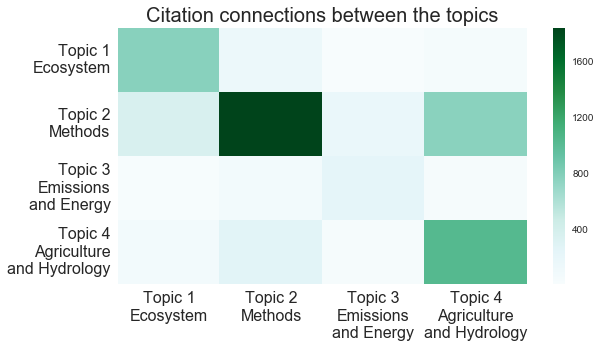

In [220]:
f, ax = plt.subplots(figsize=(9, 5))
ax = sns.heatmap(df_cite_topics, cmap='BuGn')
labels = ['Topic 1\nEcosystem',
          'Topic 2\nMethods',
          'Topic 3\nEmissions\nand Energy',
          'Topic 4\nAgriculture\nand Hydrology']
ax.set_xticklabels(labels, fontsize=16)
#ax.set_yticks([.6, 1.6, 2.6, 3.9])

ax.set_yticklabels(reversed(labels), fontsize=16, rotation='horizontal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_verticalalignment('center')
ax.set_title('Citation connections between the topics', fontsize=20)
plt.tight_layout()
plt.savefig(directory+'mesh_topiccitation.png', dpi=300)
plt.show()